In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

In [3]:
#Fetch 6 months of daily data for XLRE
etf_symbol = 'XLRE'  
data = yf.download(etf_symbol, period="6mo", interval="1d")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
# Define the list of tickers for the 30 largest holdings 
holdings_tickers = [
    'AMT', 'PLD', 'WELL', 'EQIX', 'O', 'DLR', 'SPG', 'PSA', 'CCI', 'CBRE', 
    'VICI', 'CSGP', 'VTR', 'EXR', 'AVB', 'IRM', 'SBAC', 'EQR', 'WY', 'INVH', 
    'MAA', 'ESS', 'KIM', 'DOC', 'UDR', 'ARE', 'CPT', 'REG', 'HST', 'BXP', 'FRT'
]

# Fetch 6 months of daily data for each holding
data = yf.download(holdings_tickers, period='6mo', interval='1d')

# Display the fetched data (adjusted close prices)
data.head()

[*********************100%***********************]  31 of 31 completed


Price            Close                                                 \
Ticker             AMT         ARE         AVB        BXP        CBRE   
Date                                                                    
2024-10-15  225.554016  117.913284  220.091965  84.101677  122.769997   
2024-10-16  223.676300  119.343422  222.109436  84.996376  124.370003   
2024-10-17  220.373062  117.961929  221.892929  86.474564  124.930000   
2024-10-18  222.476898  118.487289  223.536423  87.252571  125.680000   
2024-10-21  217.728500  116.278839  220.593872  84.539299  123.519997   

Price                                                                 ...  \
Ticker             CCI         CPT       CSGP         DLR        DOC  ...   
Date                                                                  ...   
2024-10-15  110.637573  117.612114  78.220001  158.820114  21.678953  ...   
2024-10-16  111.973358  118.771828  77.230003  159.726486  22.038326  ...   
2024-10-17  108.169281  117.258308  78.330002  161.263367  21.669239  ...   
2024-10-18  108.779099  118.663719  79.250000  162.928314  21.989761  ...   
2024-10-21  106.659271  116.039627  77.360001  162.750961  21.542974  ...   

Price        Volume                                                      \
Ticker          PLD     PSA     REG     SBAC      SPG      UDR     VICI   
Date                                                                      
2024-10-15  5453600  617500  612000  3295400  1374000  1956200  5124700   
2024-10-16  5565200  444000  809000   893800  1264000   971600  3977600   
2024-10-17  5446800  642000  885500   677500  1070800  1434200  3045200   
2024-10-18  3690900  368900  759700   512100  1060400  1102500  3576600   
2024-10-21  3866200  818100  871500   569300  1032000  1727600  3822500   

Price                                  
Ticker          VTR     WELL       WY  
Date                                   
2024-10-15  3291800  2442800  4210000  
2024-10-16  1633500  1560500  2331000  
2024-10-17  2077900  1971500  2378000  
2024-10-18  1531400  2187200  2538600  
2024-10-21  1579400  2416600  2221800  

[5 rows x 155 columns]

In [15]:
#Check the columns in the dataset to confirm the structure
print(data.columns)

MultiIndex([( 'Close',  'AMT'),
            ( 'Close',  'ARE'),
            ( 'Close',  'AVB'),
            ( 'Close',  'BXP'),
            ( 'Close', 'CBRE'),
            ( 'Close',  'CCI'),
            ( 'Close',  'CPT'),
            ( 'Close', 'CSGP'),
            ( 'Close',  'DLR'),
            ( 'Close',  'DOC'),
            ...
            ('Volume',  'PLD'),
            ('Volume',  'PSA'),
            ('Volume',  'REG'),
            ('Volume', 'SBAC'),
            ('Volume',  'SPG'),
            ('Volume',  'UDR'),
            ('Volume', 'VICI'),
            ('Volume',  'VTR'),
            ('Volume', 'WELL'),
            ('Volume',   'WY')],
           names=['Price', 'Ticker'], length=155)


In [33]:
# Extract just the 'Close' prices from the MultiIndex DataFrame
close = data['Close'] 

# Compute the daily returns
returns = close.pct_change().dropna()

# Preview the result
print(returns.head())

Ticker           AMT       ARE       AVB       BXP      CBRE       CCI  \
Date                                                                     
2024-10-16 -0.008325  0.012129  0.009166  0.010638  0.013033  0.012074   
2024-10-17 -0.014768 -0.011576 -0.000975  0.017391  0.004503 -0.033973   
2024-10-18  0.009547  0.004454  0.007407  0.008997  0.006003  0.005638   
2024-10-21 -0.021343 -0.018639 -0.013164 -0.031097 -0.017187 -0.019487   
2024-10-22 -0.000045 -0.012968  0.002543 -0.001265 -0.006396 -0.003812   

Ticker           CPT      CSGP       DLR       DOC  ...       PLD       PSA  \
Date                                                ...                       
2024-10-16  0.009860 -0.012657  0.005707  0.016577  ...  0.045968  0.007681   
2024-10-17 -0.012743  0.014243  0.009622 -0.016748  ... -0.033630 -0.006444   
2024-10-18  0.011986  0.011745  0.010324  0.014792  ... -0.001630  0.000637   
2024-10-21 -0.022114 -0.023849 -0.001089 -0.020318  ... -0.038612 -0.039841   
2024-10

In [38]:
# Compute covariance matrix of returns
cov_matrix = returns.cov() 
#View a Portion 
print(cov_matrix.iloc[:5, :5])

Ticker       AMT       ARE       AVB       BXP      CBRE
Ticker                                                  
AMT     0.000359  0.000170  0.000126  0.000154  0.000124
ARE     0.000170  0.000399  0.000228  0.000310  0.000229
AVB     0.000126  0.000228  0.000264  0.000263  0.000238
BXP     0.000154  0.000310  0.000263  0.000492  0.000312
CBRE    0.000124  0.000229  0.000238  0.000312  0.000498


In [39]:
from sklearn.decomposition import PCA

# Initialize and fit PCA
pca = PCA()
pca.fit(returns)

# Explained variance ratios (i.e. how much each principal component explains)
explained_variance = pca.explained_variance_ratio_

# Components (aka eigenvectors)
eigenvectors = pca.components_

# Print cumulative explained variance
print("Cumulative Explained Variance:", explained_variance.cumsum())

Cumulative Explained Variance: [0.5919948  0.69118716 0.74868618 0.78948319 0.81702473 0.84130332
 0.86117753 0.87859392 0.89340604 0.90635339 0.91814299 0.92832728
 0.93789002 0.9459545  0.95336692 0.95980738 0.96535464 0.97075192
 0.97501773 0.9790371  0.98225327 0.98517895 0.98796252 0.99049168
 0.99265616 0.99448556 0.99611204 0.99757988 0.99864907 0.99948727
 1.        ]


In [40]:
from numpy.linalg import svd

# Center the returns data (subtract the mean)
returns_centered = returns - returns.mean()

# Perform SVD
U, S, Vt = svd(returns_centered, full_matrices=False)

#Print top 5 singular values
print("Top 5 singular values:", S[:5])

Top 5 singular values: [0.86186812 0.35279383 0.26860376 0.22625386 0.18589857]


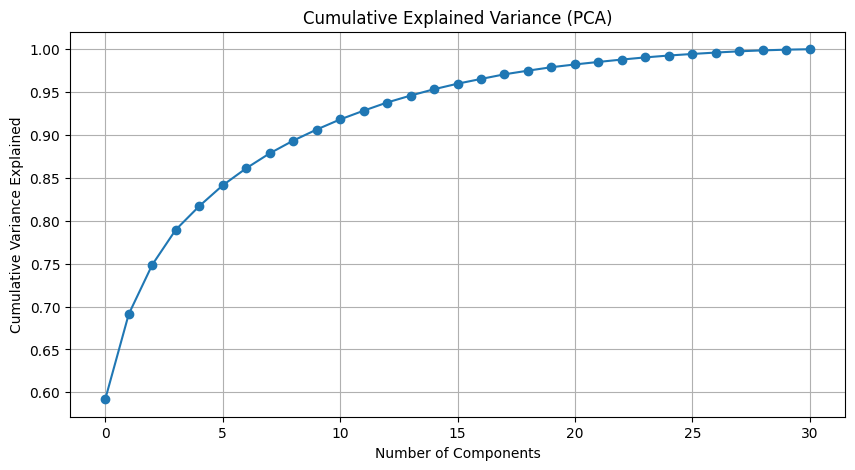

In [41]:
# PCA: Plot cumulative explained variance
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='-')
plt.title("Cumulative Explained Variance (PCA)")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.grid(True)
plt.show()

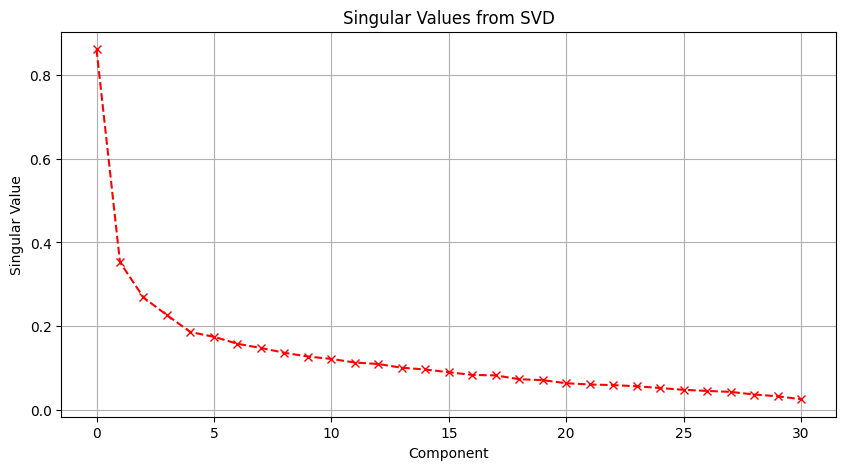

In [42]:
# SVD: Plot singular values
plt.figure(figsize=(10, 5))
plt.plot(S, marker='x', linestyle='--', color='red')
plt.title("Singular Values from SVD")
plt.xlabel("Component")
plt.ylabel("Singular Value")
plt.grid(True)
plt.show()

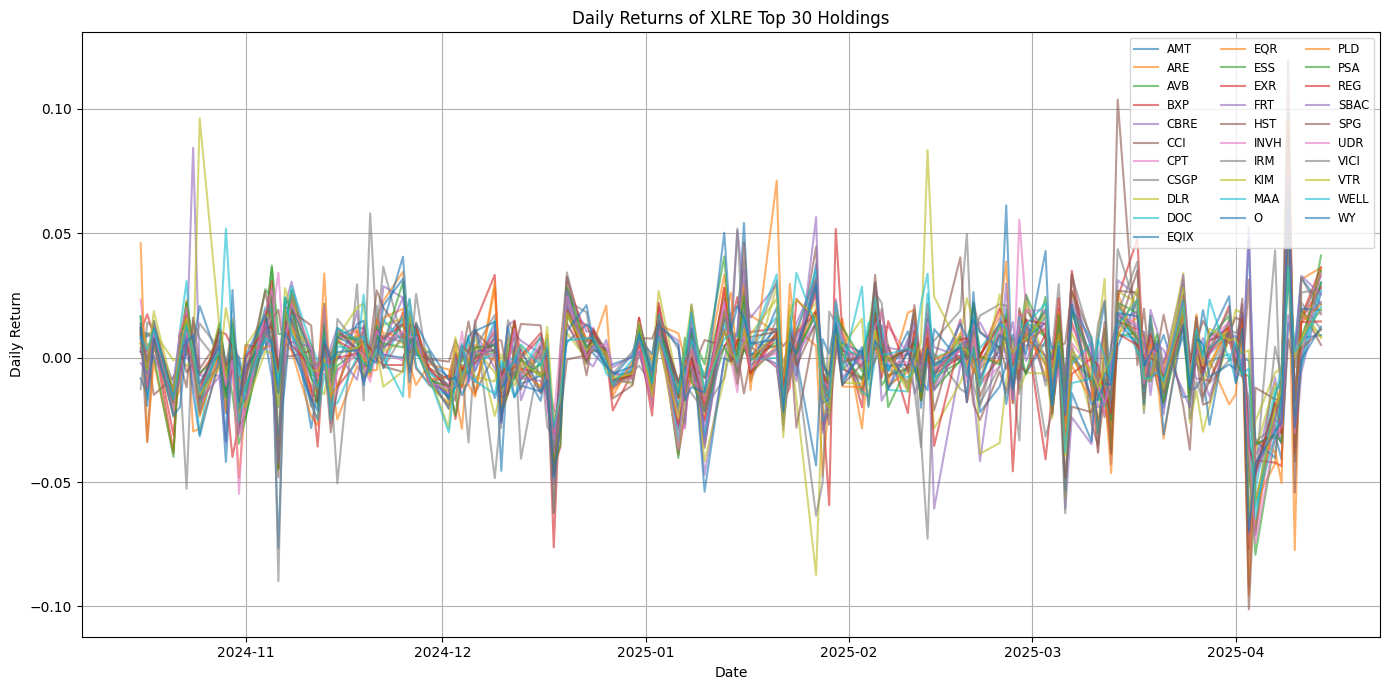

In [43]:
# Plot daily returns for all tickers
plt.figure(figsize=(14, 7))
for ticker in returns.columns:
    plt.plot(returns.index, returns[ticker], label=ticker, alpha=0.6)

plt.title("Daily Returns of XLRE Top 30 Holdings")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend(loc='upper right', fontsize='small', ncol=3)
plt.grid(True)
plt.tight_layout()
plt.show()

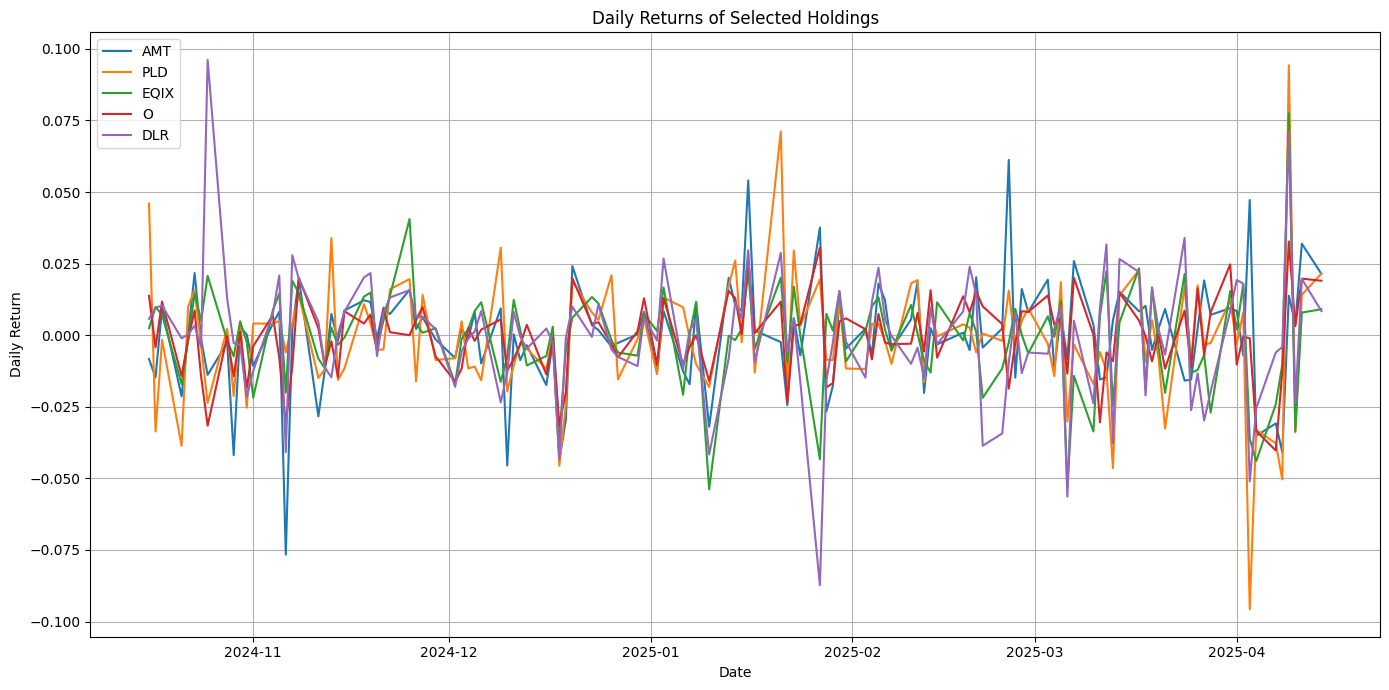

In [44]:
#The above plot is messy. 
#Plot a few tickers for better visualization. 
selected = ['AMT', 'PLD', 'EQIX', 'O', 'DLR']

plt.figure(figsize=(14, 7))
for ticker in selected:
    plt.plot(returns.index, returns[ticker], label=ticker)

plt.title("Daily Returns of Selected Holdings")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

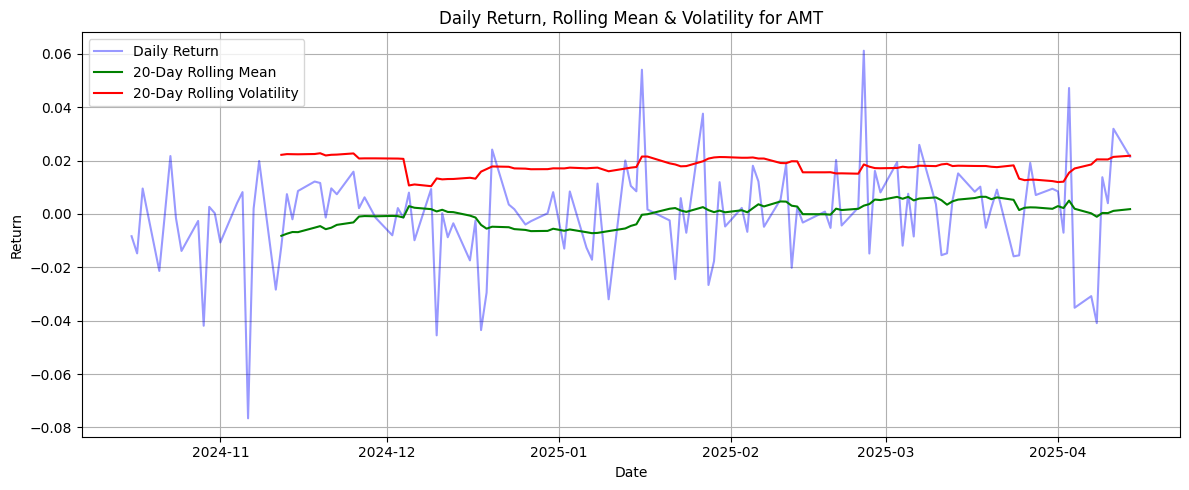

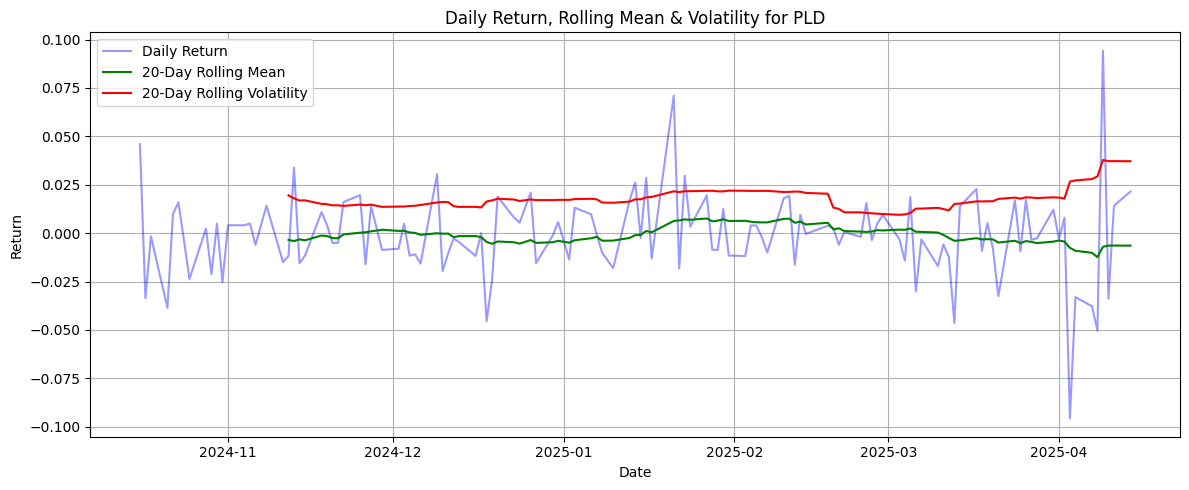

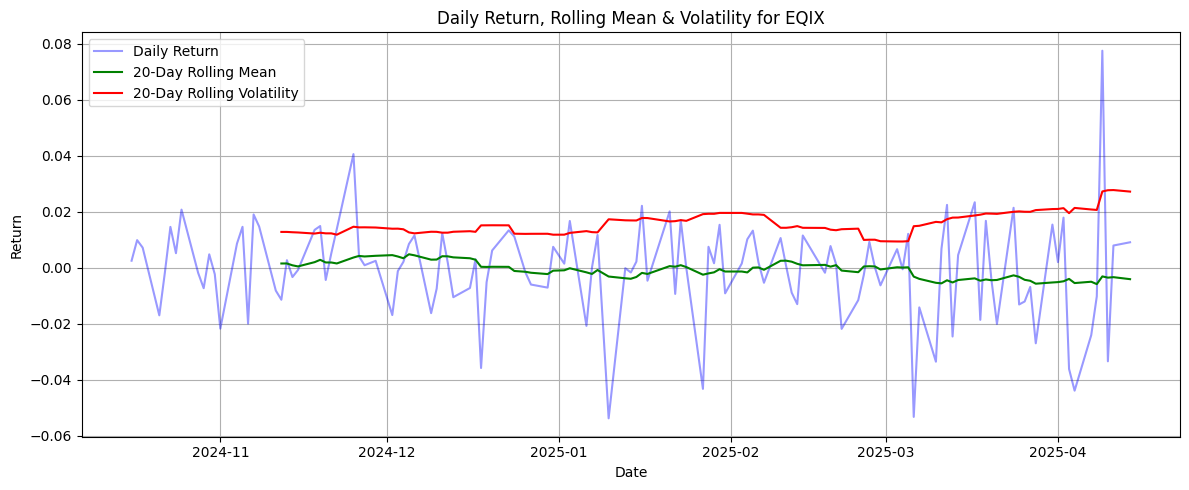

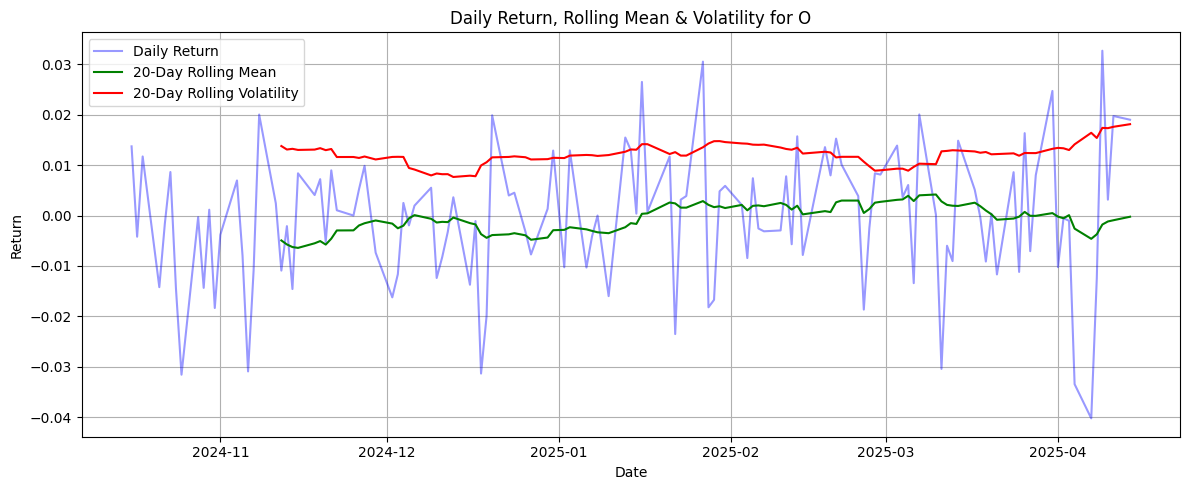

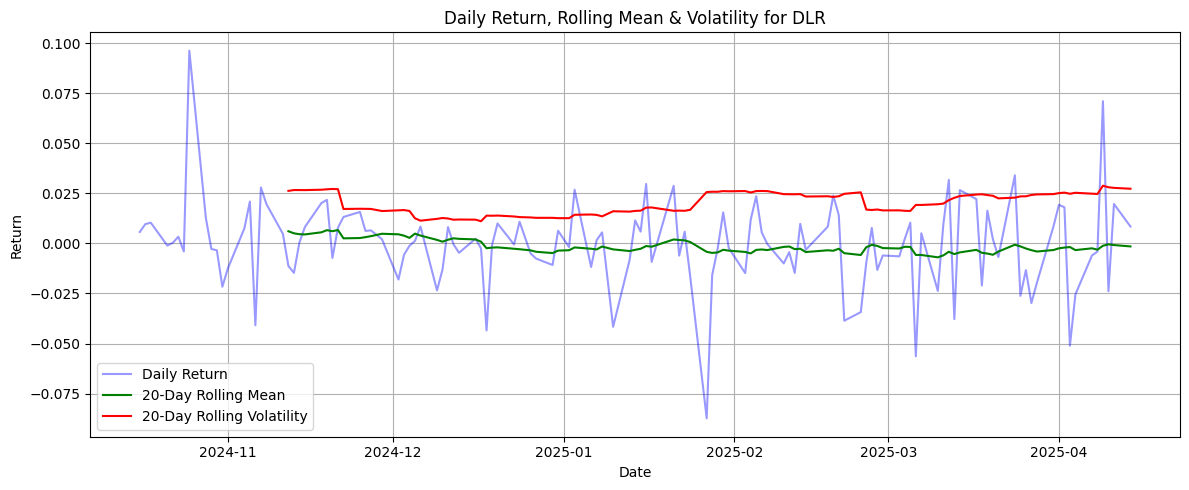

In [45]:
# A few tickers to visualize
selected = ['AMT', 'PLD', 'EQIX', 'O', 'DLR']

# Set rolling window (in days)
window = 20  # ~1 month of trading days

for ticker in selected:
    plt.figure(figsize=(12, 5))
    
    # Rolling average and rolling std deviation
    rolling_mean = returns[ticker].rolling(window=window).mean()
    rolling_std = returns[ticker].rolling(window=window).std()
    
    # Plot raw returns
    plt.plot(returns.index, returns[ticker], label='Daily Return', color='blue', alpha=0.4)
    
    # Plot rolling average
    plt.plot(rolling_mean.index, rolling_mean, label=f'{window}-Day Rolling Mean', color='green')
    
    # Plot rolling volatility (std dev)
    plt.plot(rolling_std.index, rolling_std, label=f'{window}-Day Rolling Volatility', color='red')
    
    plt.title(f"Daily Return, Rolling Mean & Volatility for {ticker}")
    plt.xlabel("Date")
    plt.ylabel("Return")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()